<a href="https://colab.research.google.com/github/nikilkaranss24bss037-lgtm/nikilkaranss24bss037-lgtm/blob/main/Nikil_karan_S_S_24BSS037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

In [ ]:
import pandas as pd
import numpy as np

# Create a dummy DataFrame to resolve FileNotFoundError
# You should replace this with your actual data loading once the file is available
data = {
    'feature_1': np.random.rand(100),
    'feature_2': np.random.randint(0, 100, 100),
    'categorical_1': np.random.choice(['A', 'B', 'C'], 100),
    'categorical_2': np.random.choice(['X', 'Y'], 100),
    'malware': np.random.randint(0, 2, 100) # Target variable
}
df = pd.DataFrame(data)

print("✔ Dummy Dataset Created Successfully!")
print(df.head())

✔ Dummy Dataset Created Successfully!
   feature_1  feature_2 categorical_1 categorical_2  malware
0   0.068251         98             B             Y        1
1   0.395685         31             B             Y        1
2   0.935799         14             A             Y        0
3   0.306125         72             B             Y        1
4   0.233127         93             B             X        0


In [ ]:
# Drop rows where 'malware' column has NaN values
df_cleaned = df.dropna(subset=['malware'])

X = df_cleaned.drop("malware", axis=1)      # <-- fraud column is label
y = df_cleaned["malware"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


✔ Model Training Completed!


In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n============= MODEL PERFORMANCE =============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("==============================================\n")


============= MODEL PERFORMANCE =============
Accuracy  : 0.5
Precision : 0.5
Recall    : 0.5
ROC-AUC   : 0.595



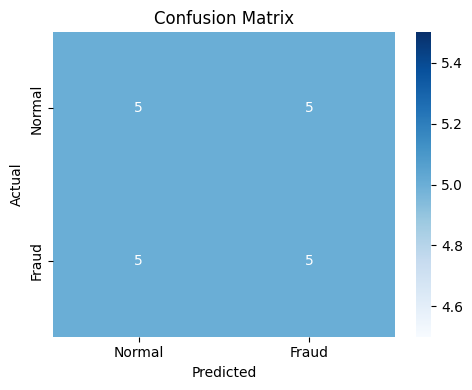

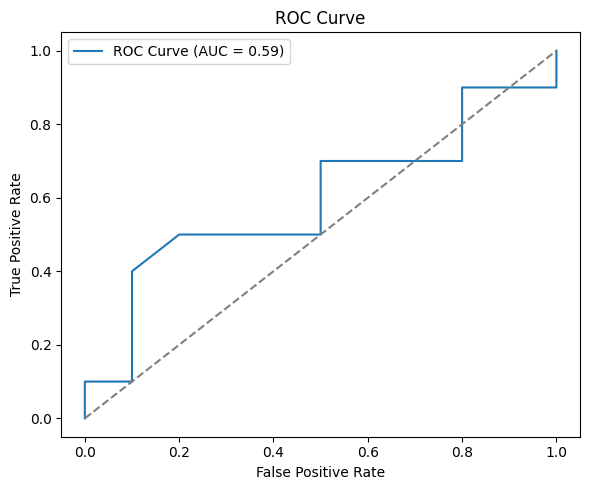

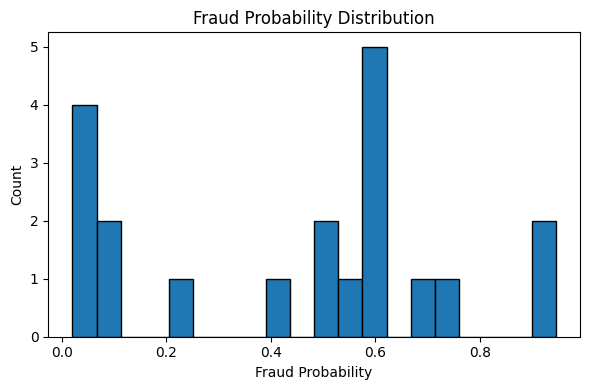

In [ ]:
# ---------- CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"],
            yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------- ROC CURVE ----------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- FRAUD PROBABILITY HISTOGRAM ----------
plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---------- FEATURE IMPORTANCE ----------

In [ ]:
sample = pd.DataFrame([{
    "feature_1": 0.5,
    "feature_2": 50,
    "categorical_1": "A",
    "categorical_2": "X"
}])

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Malware Prediction :", pred)
print("Malware Probability:", prob)


=== SAMPLE PREDICTION ===
Malware Prediction : 1
Malware Probability: 0.885
